In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('airfoil_self_noise.dat',sep='\t',header=None)

In [4]:
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [5]:
df.columns = ["Frequency","Angle of attack","Chord length","Free-stream velocity","Suction side displacement thickness","Scaled sound pressure level"]

In [6]:
df.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [7]:
df.isnull().sum()

Frequency                              0
Angle of attack                        0
Chord length                           0
Free-stream velocity                   0
Suction side displacement thickness    0
Scaled sound pressure level            0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [10]:
X_train.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness
845,500,11.2,0.0508,71.3,0.014072
1026,10000,4.8,0.0254,55.5,0.000873
621,2000,7.2,0.1524,39.6,0.009092
1371,630,6.7,0.1016,31.7,0.005929
195,6300,0.0,0.2286,71.3,0.002143


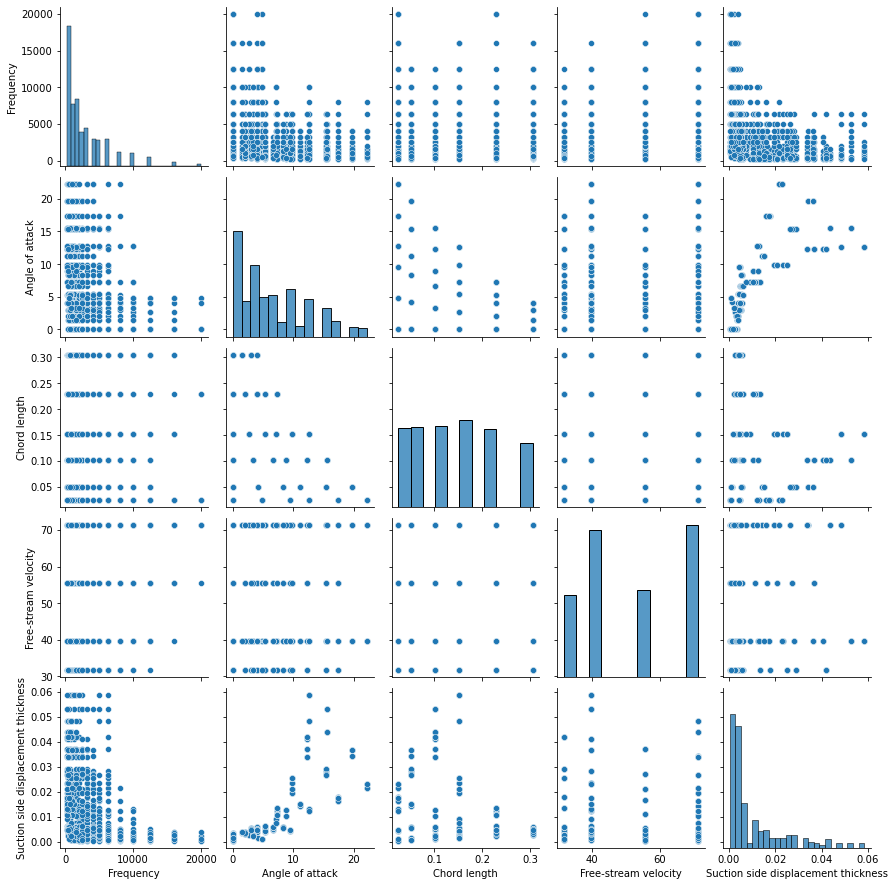

In [11]:
import seaborn as sns
sns.pairplot(X_train)

In [12]:
import matplotlib.pyplot as plt
X_train.corr()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness
Frequency,1.000000,-0.273327,-0.000324,0.125247,-0.239878
Angle of attack,-0.273327,1.000000,-0.498257,0.058603,0.762567
Chord length,-0.000324,-0.498257,1.000000,0.013061,-0.220849
Free-stream velocity,0.125247,0.058603,0.013061,1.000000,-0.000519
Suction side displacement thickness,-0.239878,0.762567,-0.220849,-0.000519,1.000000


C:\Users\shreyas.banagar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Frequency'>

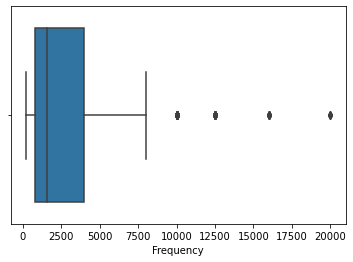

In [13]:
sns.boxplot(X_train['Frequency'])

C:\Users\shreyas.banagar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Frequency', ylabel='Scaled sound pressure level'>

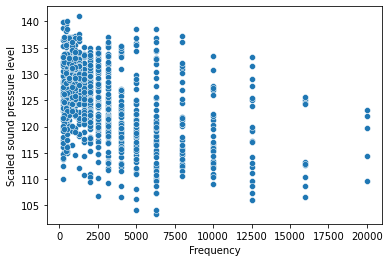

In [14]:
sns.scatterplot(X_train['Frequency'],y_train)

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [16]:
import pickle
pickle.dump(regressor,open('model.pkl','wb'))

In [17]:
pickle_model = pickle.load(open('model.pkl','rb'))
pickle_model.predict(X_test)

array([124.06768512, 119.59316737, 120.29933092, 129.61912851,
       129.81089779, 132.61068301, 122.44438053, 126.7461602 ,
       129.99906397, 125.94601069, 132.50626617, 113.78942913,
       130.10151743, 132.51123677, 123.6412694 , 114.10666435,
       124.31679905, 126.6766228 , 129.24252599, 131.79580713,
       125.77675782, 125.02970619, 116.44955941, 129.88018679,
       124.2232864 , 124.67967727, 131.60657138, 124.57186337,
       115.76458243, 123.39652912, 125.13674229, 123.92018299,
       125.4841971 , 118.61796101, 121.70395495, 130.95730463,
       131.39243856, 128.29169206, 121.31077749, 117.99901537,
       126.41139865, 128.86175217, 126.44075781, 123.46463781,
       123.08590861, 130.13707376, 125.11244177, 120.01115538,
       123.19344296, 132.81698484, 128.72414835, 117.7903339 ,
       123.4283675 , 122.57110308, 126.71758509, 120.44811529,
       123.29741941, 128.68403927, 124.25898336, 123.22309466,
       125.44226349, 131.08621938, 126.73671008, 131.37

In [18]:
X_test

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness
51,400,0.0,0.3048,31.7,0.003313
1465,1250,12.3,0.1016,31.7,0.041876
184,2500,4.0,0.3048,39.6,0.005796
1000,4000,0.0,0.0254,31.7,0.000439
746,5000,0.0,0.0508,55.5,0.000762
...,...,...,...,...,...
1295,1000,3.3,0.1016,71.3,0.002028
578,3150,5.4,0.1524,39.6,0.004850
352,1250,4.0,0.2286,31.7,0.005091
727,1250,0.0,0.0508,71.3,0.000740


In [19]:
dict_test = {
    "Frequency": 9,
    "Angle of attack": 8,
    "Chord length": 10,
    "Free-steam velocity": 1,
    "Suction side": 7
}

In [24]:
[list(dict_test.values())]

[[9, 8, 10, 1, 7]]

In [25]:
pickle_model.predict([list(dict_test.values())])

C:\Users\shreyas.banagar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([-1271.05117911])

In [26]:
pickle_model.predict([list(dict_test.values())])[0]

C:\Users\shreyas.banagar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


-1271.0511791051395

In [27]:
pickle_model.predict([[400, 0, 0.3048, 31.7, 0.003313]])[0]

C:\Users\shreyas.banagar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


124.06763396871985